# Problem Statement:-
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Importing Modules:-


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv("Flight Price.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA:-

In [18]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

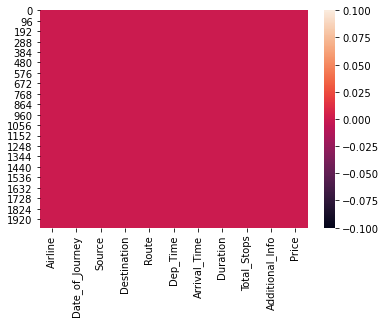

In [19]:
sns.heatmap(df.isnull())
plt.show()

We can see that there are 2 null values in the dataset in columns 'Route' and 'Total_Stops'.
As the Null Values column are very less we will remove the entire row with null values and it will not effect our dataset and model prediction and it will help our model in more accurate prediction.

In [20]:
df.shape

(2000, 11)

In [21]:
r=df.isnull().any(axis=1)
df[r]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


We can see that only this row has 2 null values so we will remove it from our dataset and as the dataset is big enough it will not effect our dataset and model building.

In [10]:
df.shape

(10682, 11)

In [23]:
df[['Day','Month','Year']]=df['Date_of_Journey'].str.split('/',expand=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [24]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [25]:
df.shape

(2000, 13)

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


Now the date is seperated we can see that their is some error in the arrival time so we will treat it for better dataset.

In [27]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'Year'],
      dtype='object')

In [28]:
df.describe()

,Price
count,2000.000000
mean,9102.897500
std,4706.380523
min,1840.000000
25%,5212.250000
50%,8266.000000
75%,12524.000000
max,54826.000000


In [29]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                object
Month              object
Year               object
dtype: object

In [30]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [31]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
for i in ['Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [32]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Day                        object
Month                      object
Year                       object
dtype: object

In [33]:
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [34]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35


In [36]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
             duration[i]=duration[i] + ' 0m'
        else:
             duration[i]='0h '+ duration[i]

In [37]:
df['Duration']=duration

In [38]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,06,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35


In [39]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [40]:
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)

In [41]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,06,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35,4,45


In [42]:
drop_col(df,'Duration')

In [43]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Day                  object
Month                object
Year                 object
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [44]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [45]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [46]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'Day',
 'Month',
 'Year',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

# Handling Categorical Data:-

In [47]:
categorical = df[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [48]:
categorical['Airline'].value_counts()

Jet Airways                          715
IndiGo                               399
Air India                            318
Multiple carriers                    223
SpiceJet                             146
Vistara                               94
Air Asia                              62
GoAir                                 39
Multiple carriers Premium economy      2
Vistara Premium economy                1
Jet Airways Business                   1
Name: Airline, dtype: int64

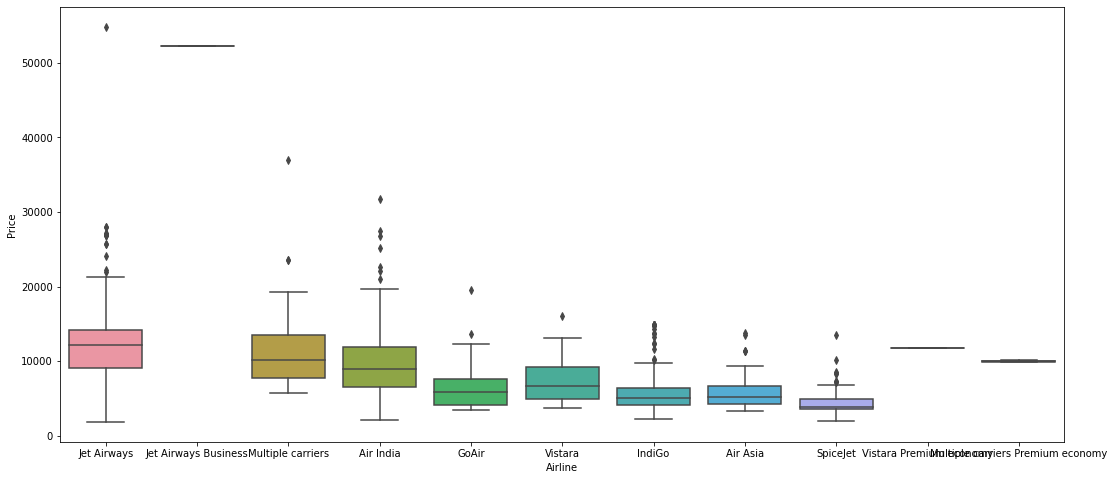

In [49]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

We can observe that the Jet Airways has the maximum price and all the other airlines are almost having the similar price.

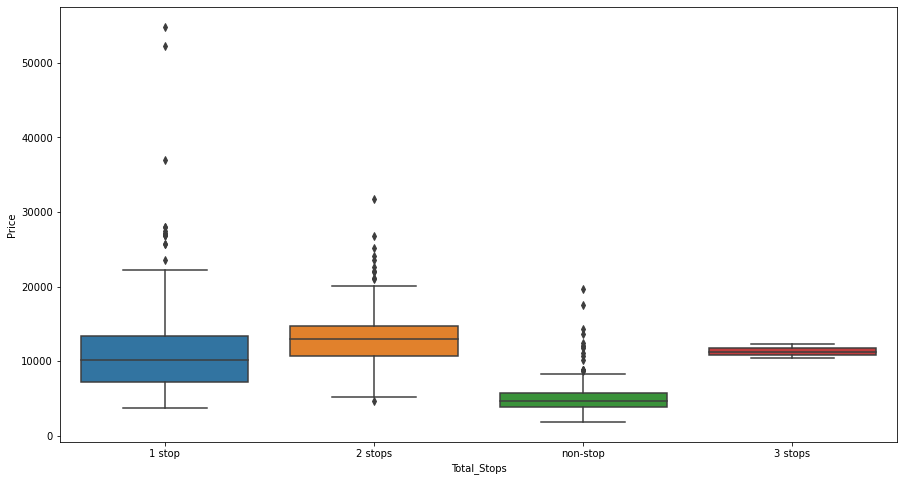

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

## Performing One Hot Encoding :-

In [51]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [52]:
categorical['Source'].value_counts()

Delhi       873
Kolkata     495
Banglore    429
Mumbai      115
Chennai      88
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

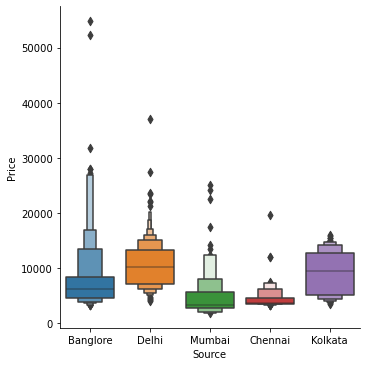

In [53]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.show()

In [54]:
#Encoding the Source Column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [55]:
categorical['Destination'].value_counts()

Cochin       873
Banglore     495
Delhi        247
New Delhi    182
Hyderabad    115
Kolkata       88
Name: Destination, dtype: int64

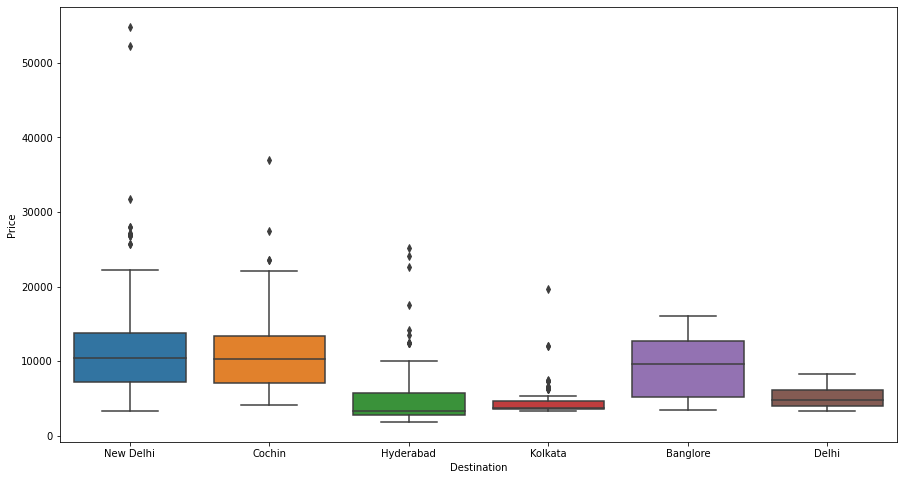

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

In [57]:
#Encoding the Destination Column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [58]:
categorical['Route'].value_counts()

DEL → BOM → COK          442
BLR → DEL                300
CCU → BOM → BLR          189
CCU → BLR                122
BOM → HYD                104
                        ... 
BLR → PNQ → DEL            1
CCU → IXR → BBI → BLR      1
BLR → BOM → AMD → DEL      1
BLR → NAG → DEL            1
CCU → KNU → BLR            1
Name: Route, Length: 87, dtype: int64

In [59]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [60]:
drop_col(categorical,'Route')

In [61]:
categorical.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Route1                0
Route2                0
Route3              650
Route4             1717
Route5             1996
dtype: int64

# Treating Null Values:-

In [62]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [63]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [65]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [66]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,20,7,3
1,Air India,Kolkata,Banglore,2 stops,No info,2,22,1,0,3
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,28,4,2,3
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,30,3,7,3
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,30,7,7,3


In [67]:
drop_col(categorical,'Additional_Info')

In [68]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops'], dtype=object)

In [69]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [70]:
categorical['Total_Stops']

0       0
1       2
2       2
3       1
4       1
       ..
1995    0
1996    1
1997    1
1998    1
1999    1
Name: Total_Stops, Length: 2000, dtype: int64

In [71]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

# After all the preprocessing our Data is Ready for Modeling:-

In [72]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Price,Day,Month,Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,20,7,3,0,0,1,0,...,3897,24,3,2019,22,20,1,10,2,50
1,2,2,22,1,0,3,1,0,0,0,...,7662,1,5,2019,5,50,13,15,7,25
2,2,3,28,4,2,3,0,0,0,1,...,13882,9,6,2019,9,25,4,25,19,0
3,1,2,30,3,7,3,0,0,1,0,...,6218,12,5,2019,18,5,23,30,5,25
4,1,0,30,7,7,3,0,0,1,0,...,13302,1,3,2019,16,50,21,35,4,45


# Checking for any Outliers:-

In [73]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

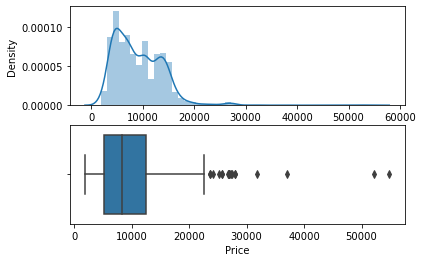

In [74]:
plot(final_df,'Price')

We can see that there is some Outliers in the Price Column so we will replace it with the median.

In [75]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

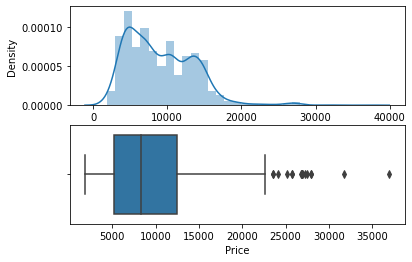

In [76]:
plot(final_df,'Price')

# Creating train_test_split:-

In [77]:
x=final_df.drop('Price',axis=1)
y=final_df['Price']

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=95)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

R2: 0.584239655160348
MAE: 2009.682230721924
MSE: 9355144.628552025
RMSE: 3058.618091320331


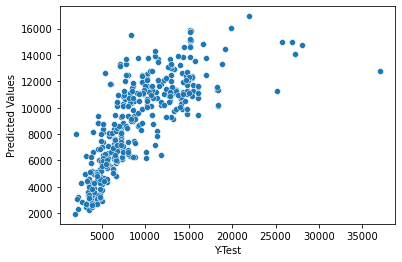

In [80]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R2: {}'.format(metrics.r2_score(y_test, predlr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

R Square: 0.61797010146868
MAE: 1708.21625
MSE: 8596166.030625
RMSE: 2931.9219004988863


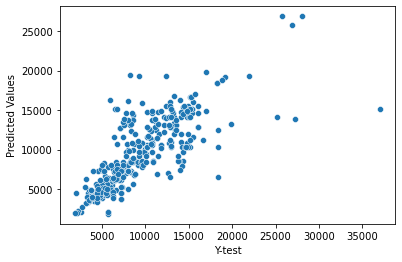

In [81]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
preddtr = dtr.predict(x_test)
sns.scatterplot(y_test, preddtr)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, preddtr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preddtr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preddtr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preddtr))))

R Square: 0.7769600185891188
MAE: 1373.1098074702384
MSE: 5018687.592375088
RMSE: 2240.2427530013542


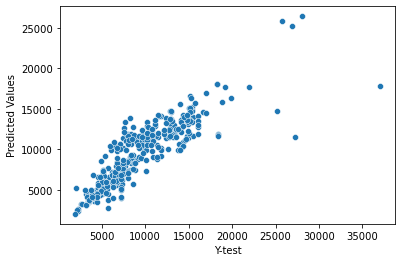

In [82]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
sns.scatterplot(y_test, predrfr)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, predrfr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predrfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predrfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predrfr))))

R Square: 0.5040894426013143
MAE: 2274.9649642242084
MSE: 11158627.908777155
RMSE: 3340.4532490033675


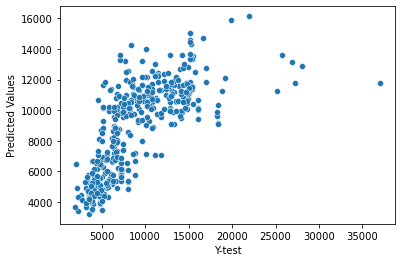

In [83]:
en = ElasticNet() 
en.fit(x_train, y_train)
preden = en.predict(x_test)
sns.scatterplot(y_test, preden)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, preden)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preden)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preden)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preden))))

R Square: 0.5616340341819586
MAE: 2508.821364951833
MSE: 9863800.29111317
RMSE: 3140.668764946913


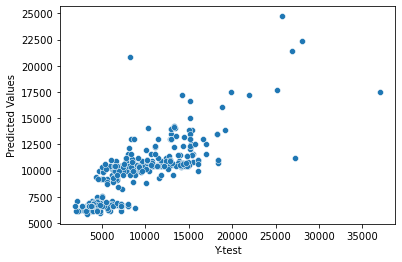

In [84]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
predada = ada.predict(x_test)
sns.scatterplot(y_test, predada)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, predada)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))

Here we can see that our RandomForestRegressor performs well as it has the most lowest metric scores among all the three model and higher r2_score

## Performing cross validation

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
scr = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score for Linear Regression:", scr.mean())

Cross validation score for Linear Regression: 0.6019038712499285


In [88]:
scr = cross_val_score(dtr, x, y, cv=5, scoring='r2')
print("Cross validation score for Decision Tree Regressor:", scr.mean())

Cross validation score for Decision Tree Regressor: 0.6202924272878233


In [89]:
scr = cross_val_score(rfr, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.786678967205364


In [90]:
scr = cross_val_score(en, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.5389117277540217


In [91]:
scr = cross_val_score(ada, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.5657270532576655


In cross validation our Random Forest Regressor performs well, so we will select RandomForestRegressor for HyperParameter Tuning.

# HyperParameter Tuning:-

In [92]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
GCV = GridSearchCV(RandomForestRegressor(), random_grid, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 11, 14, 17, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [100, 136, 172, 209, 245, 281, 318,
                                          354, 390, 427, 463, 500]})

In [95]:
GCV.best_params_

{'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 172}

In [103]:
rfrGCV = RandomForestRegressor(max_depth=17, max_features='auto', min_samples_leaf=2, n_estimators=172)
rfrGCV.fit(x_train, y_train)
predGCV = rfrGCV.predict(x_test)
print('R square:', metrics.r2_score(y_test, predGCV))

R square: 0.7751142878456723


### Checking how much our predictions are correct 

In [104]:
prediction = pd.DataFrame({"Predictions":predGCV, "Real Value":y_test})

In [105]:
prediction.round(2)

,Predictions,Real Value
498,8636.93,8610.0
1888,11459.88,7064.0
1683,11134.94,14388.0
1192,5480.68,5601.0
321,12053.25,10262.0
...,...,...
759,4336.11,3943.0
936,25562.68,25735.0
90,10736.84,9646.0
552,5319.05,3739.0


# Saving the Model:-

In [106]:
import joblib
joblib.dump(rfrGCV ,'flight.pkl')

['flight.pkl']